In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('bank.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [86]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [87]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [88]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


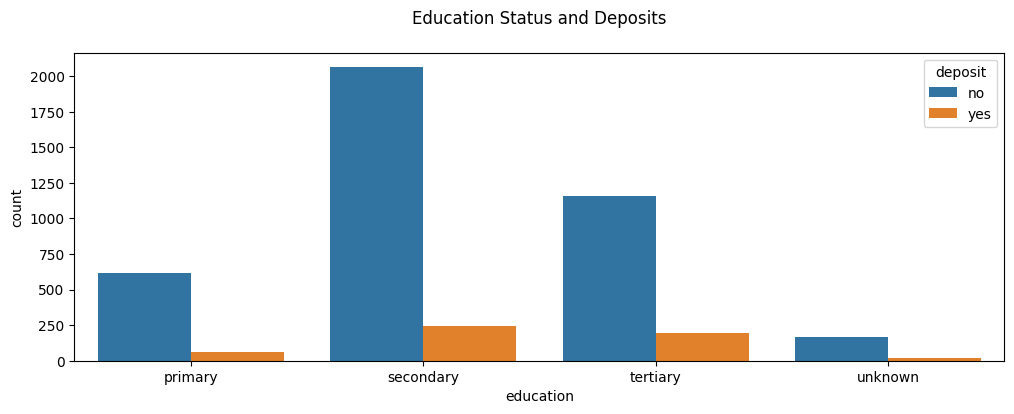

In [89]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= df, hue ="deposit")
plt.title("Education Status and Deposits\n")
plt.show()

In [113]:
lb = LabelEncoder()
df_encoded = df.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [118]:
# Select relevant features and target variable
X = df.drop(columns=['deposit'])
y = df['deposit']

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [120]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [121]:
mscore(dt)

Training Score 0.918141592920354
Testing Score 0.8983425414364641


In [122]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
ypred = decision_tree.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          no       0.93      0.92      0.92       807
         yes       0.38      0.42      0.40        98

    accuracy                           0.86       905
   macro avg       0.66      0.67      0.66       905
weighted avg       0.87      0.86      0.87       905



In [123]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8994475138121547
Confusion Matrix
 [[781  26]
 [ 65  33]]
Classification Report
               precision    recall  f1-score   support

          no       0.92      0.97      0.94       807
         yes       0.56      0.34      0.42        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



In [124]:
cn = ['no','yes']
fn = X_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


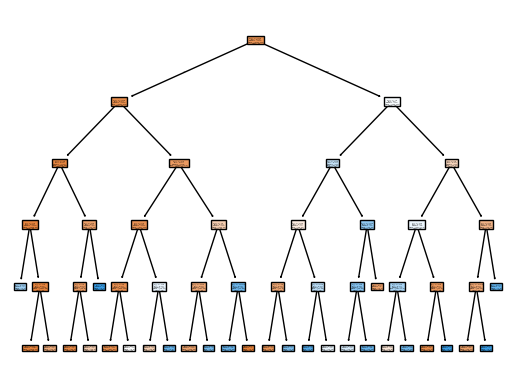

In [125]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [126]:
ds = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
ds.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [127]:
mscore(ds)

Training Score 0.9054203539823009
Testing Score 0.901657458563536


In [128]:
ypred_ds = ds.predict(x_test)

In [129]:
eval_model(y_test,ypred_ds)

Accuracy_Score 0.901657458563536
Confusion Matrix
 [[785  22]
 [ 67  31]]
Classification Report
               precision    recall  f1-score   support

          no       0.92      0.97      0.95       807
         yes       0.58      0.32      0.41        98

    accuracy                           0.90       905
   macro avg       0.75      0.64      0.68       905
weighted avg       0.88      0.90      0.89       905



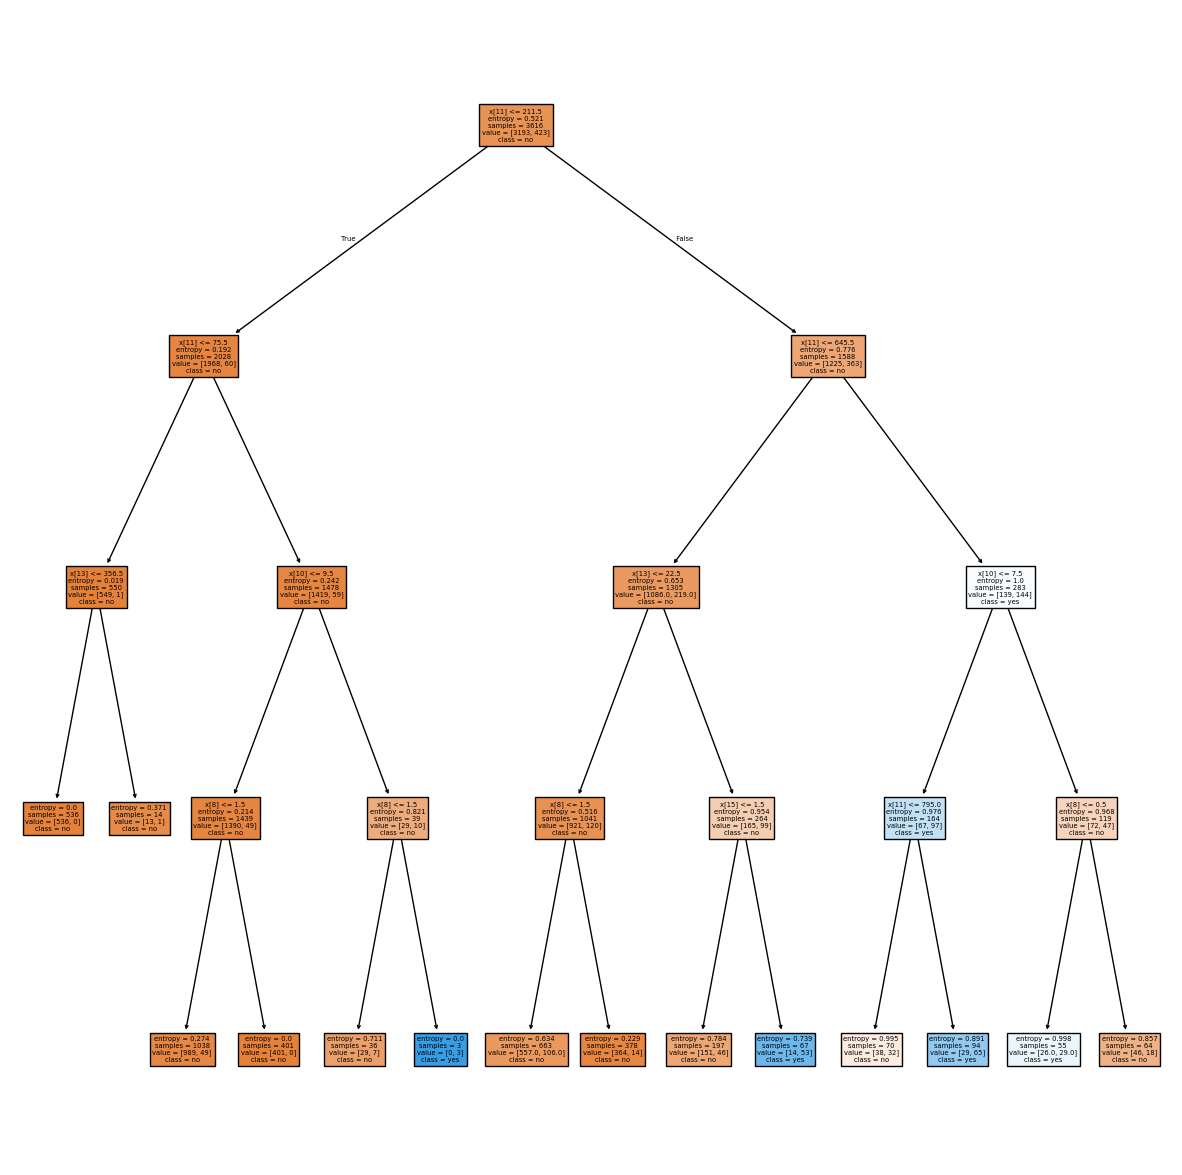

In [130]:
plt.figure(figsize=(15,15))
plot_tree(ds,class_names=cn,filled=True)
plt.show()